# Time Series - Chocolura

## Importando bibliotecas

In [108]:
%matplotlib inline
import pandas as pd
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

from datetime import date
import calendar

from matplotlib import pyplot as plt
import numpy as np

dados = pd.read_csv('dados/chocolura.csv')
dados['mes'] = pd.to_datetime(dados['mes'])
dados['aumento'] = dados.vendas.diff()
dados['aceleracao'] = dados.aumento.diff()

## Definição das funções

In [68]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    
def plot_comparacao(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc="left")
    sns.lineplot(x=x, y = y1, data=dataset)

    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

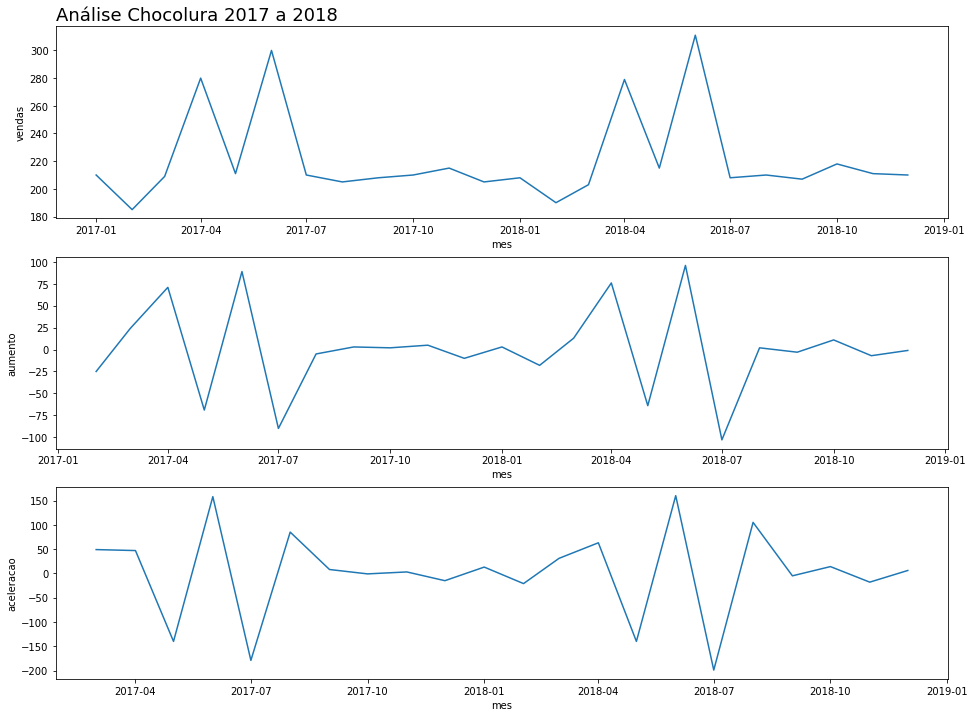

In [69]:
plot_comparacao('Análise Chocolura 2017 a 2018', 'mes', 'vendas', 'aumento', 'aceleracao', dados)

## Vendas diárias (Outubro e Novembro)

In [91]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.day_name()

dias_traduzidos = {'Monday': 'Segunda', 
                  'Tuesday': 'Terca', 
                  'Wednesday': 'Quarta', 
                  'Thursday': 'Quinta', 
                  'Friday': 'Sexta', 
                  'Saturday': 'Sabado',
                  'Sunday': 'Domingo'}

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


dia              datetime64[ns]
vendas                    int64
aumento                 float64
aceleracao              float64
dia_da_semana            object
dtype: object

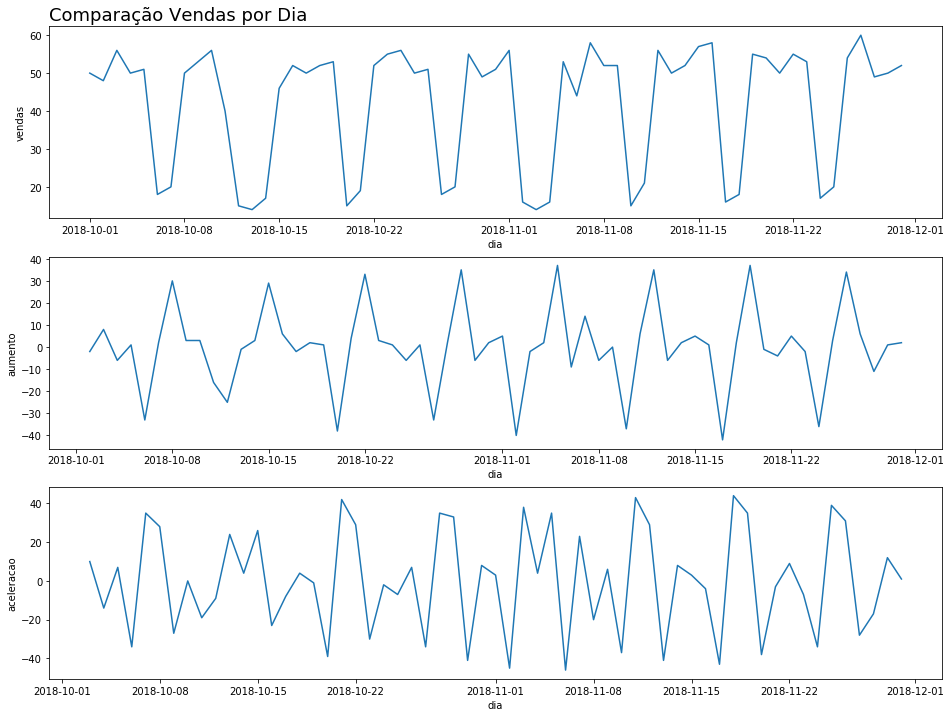

In [90]:
plot_comparacao('Comparação Vendas por Dia', 'dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia)

vendas_por_dia.dtypes

## Analisando a sazonalidade
### Agrupando os dias

In [99]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento','aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


## Correlação das vendas diárias

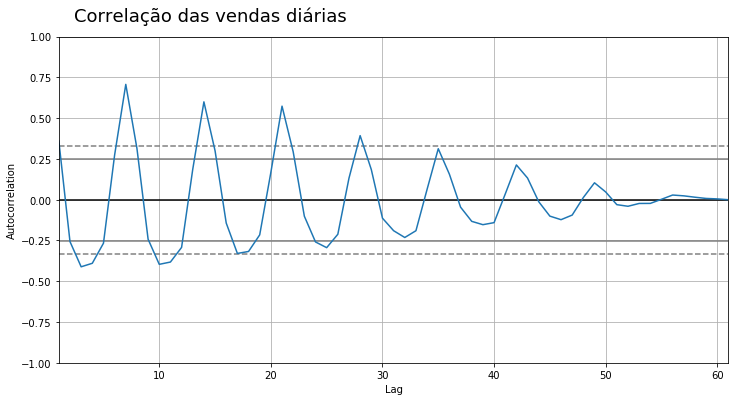

In [103]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])


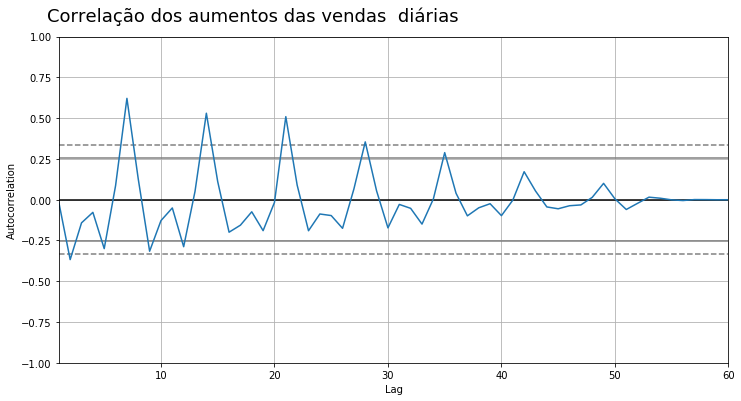

In [105]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos aumentos das vendas  diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])


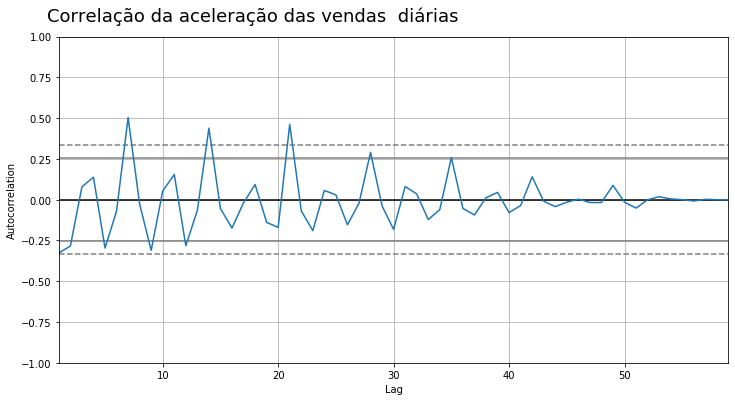

In [106]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleração das vendas  diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])


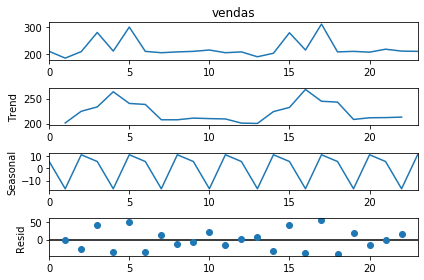

In [111]:
resultado = seasonal_decompose(dados['vendas'], period=3)
ax = resultado.plot()


In [118]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

data = ({'observacao': observacao,
        'tendencia': tendencia,
        'sazonalidade': sazonalidade,
        'ruido': ruido})

resultado = pd.DataFrame(data)

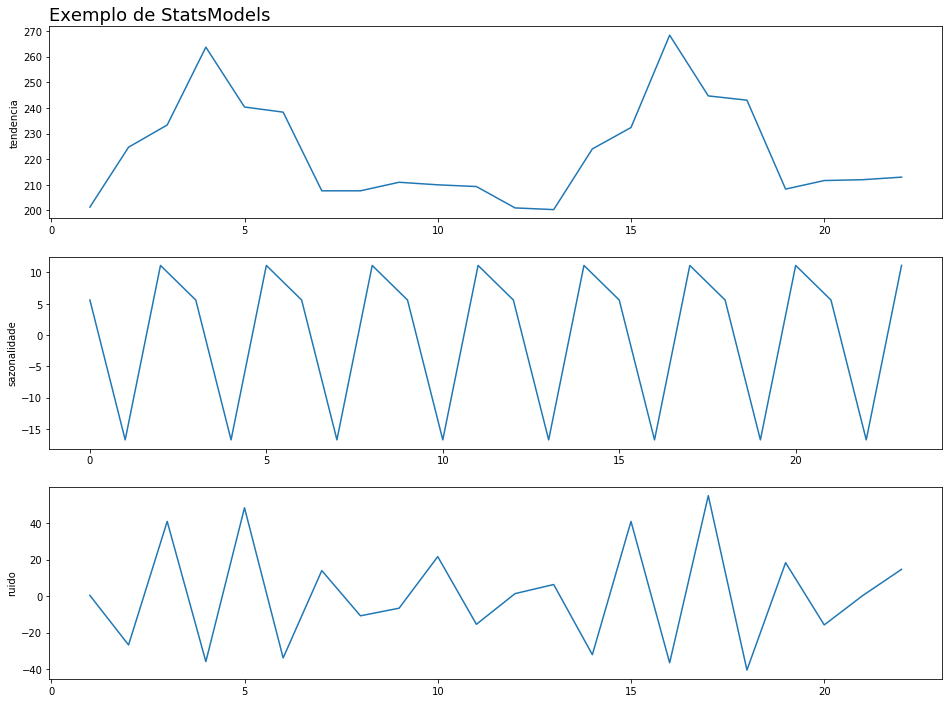

In [122]:
plot_comparacao('Exemplo de StatsModels', resultado.index, 'tendencia', 'sazonalidade','ruido', resultado)